# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5712 files belonging to 4 classes.


 Validation Image

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1311 files belonging to 4 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [13]:

cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,003,760 (57.23 MB)

 Trainable params: 15,003,760 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5478 - loss: 1.9987 - val_accuracy: 0.7445 - val_loss: 0.5959
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 936ms/step - accuracy: 0.8029 - loss: 0.5095 - val_accuracy: 0.8284 - val_loss: 0.4297
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 164s 914ms/step - accuracy: 0.8651 - loss: 0.3825 - val_accuracy: 0.8749 - val_loss: 0.3091
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 927ms/step - accuracy: 0.8934 - loss: 0.2957 - val_accuracy: 0.8902 - val_loss: 0.3036
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 164s 917ms/step - accuracy: 0.9136 - loss: 0.2378 - val_accuracy: 0.9405 - val_loss: 0.1838
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 170s 952ms/step - accuracy: 0.9479 - loss: 0.1470 - val_accuracy: 0.9504 - val_loss: 0.1347
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 164s 914ms/step - accuracy: 0.9653 - loss: 0.1070 - val_accuracy: 0.9306 - val_loss: 0.1920
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 912ms/step - accuracy: 0.9684 - lo

## Evaluating Model

In [17]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 183ms/step - accuracy: 0.9941 - loss: 0.0237
Training accuracy: 0.994397759437561


In [18]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.9709 - loss: 0.1024
Validation accuracy: 0.9656750559806824


### Saving Model

In [19]:
cnn.save('trained_brain_tumor.keras')

In [20]:

import json
with open('training_brain_tumor.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
training_history.history

{'accuracy': [0.66246497631073,
  0.8135504126548767,
  0.8742997050285339,
  0.9035364389419556,
  0.9240196347236633,
  0.9509803652763367,
  0.9614846110343933,
  0.9690126180648804,
  0.9770658016204834,
  0.9803921580314636],
 'loss': [1.0434436798095703,
  0.4848882853984833,
  0.34761178493499756,
  0.2717644274234772,
  0.2036619484424591,
  0.14077873528003693,
  0.11314383894205093,
  0.08947286754846573,
  0.06461676210165024,
  0.06281779706478119],
 'val_accuracy': [0.7444698810577393,
  0.8283752799034119,
  0.8749046325683594,
  0.8901602029800415,
  0.9405034184455872,
  0.950419545173645,
  0.9305873513221741,
  0.9519450664520264,
  0.9595728516578674,
  0.9656750559806824],
 'val_loss': [0.5959011912345886,
  0.42966827750205994,
  0.3091016709804535,
  0.3035920560359955,
  0.18382054567337036,
  0.1346859335899353,
  0.1919870376586914,
  0.1545148342847824,
  0.1439387947320938,
  0.12040756642818451]}

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

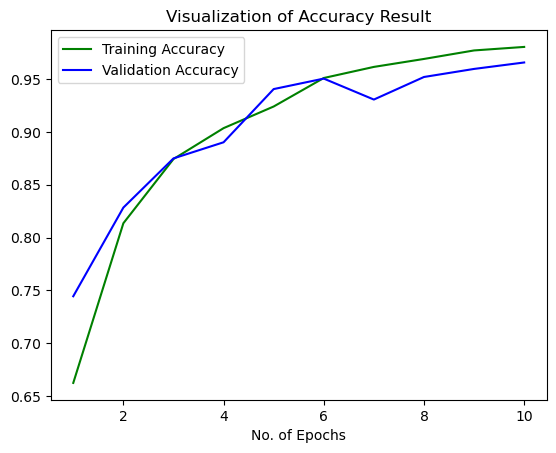

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1311 files belonging to 4 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step


In [27]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [28]:
Y_true

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [29]:
predicted_categories

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      glioma       0.98      0.92      0.95       300
  meningioma       0.91      0.96      0.94       306
     notumor       1.00      0.98      0.99       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.97      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



### Confusion Matrix Visualization

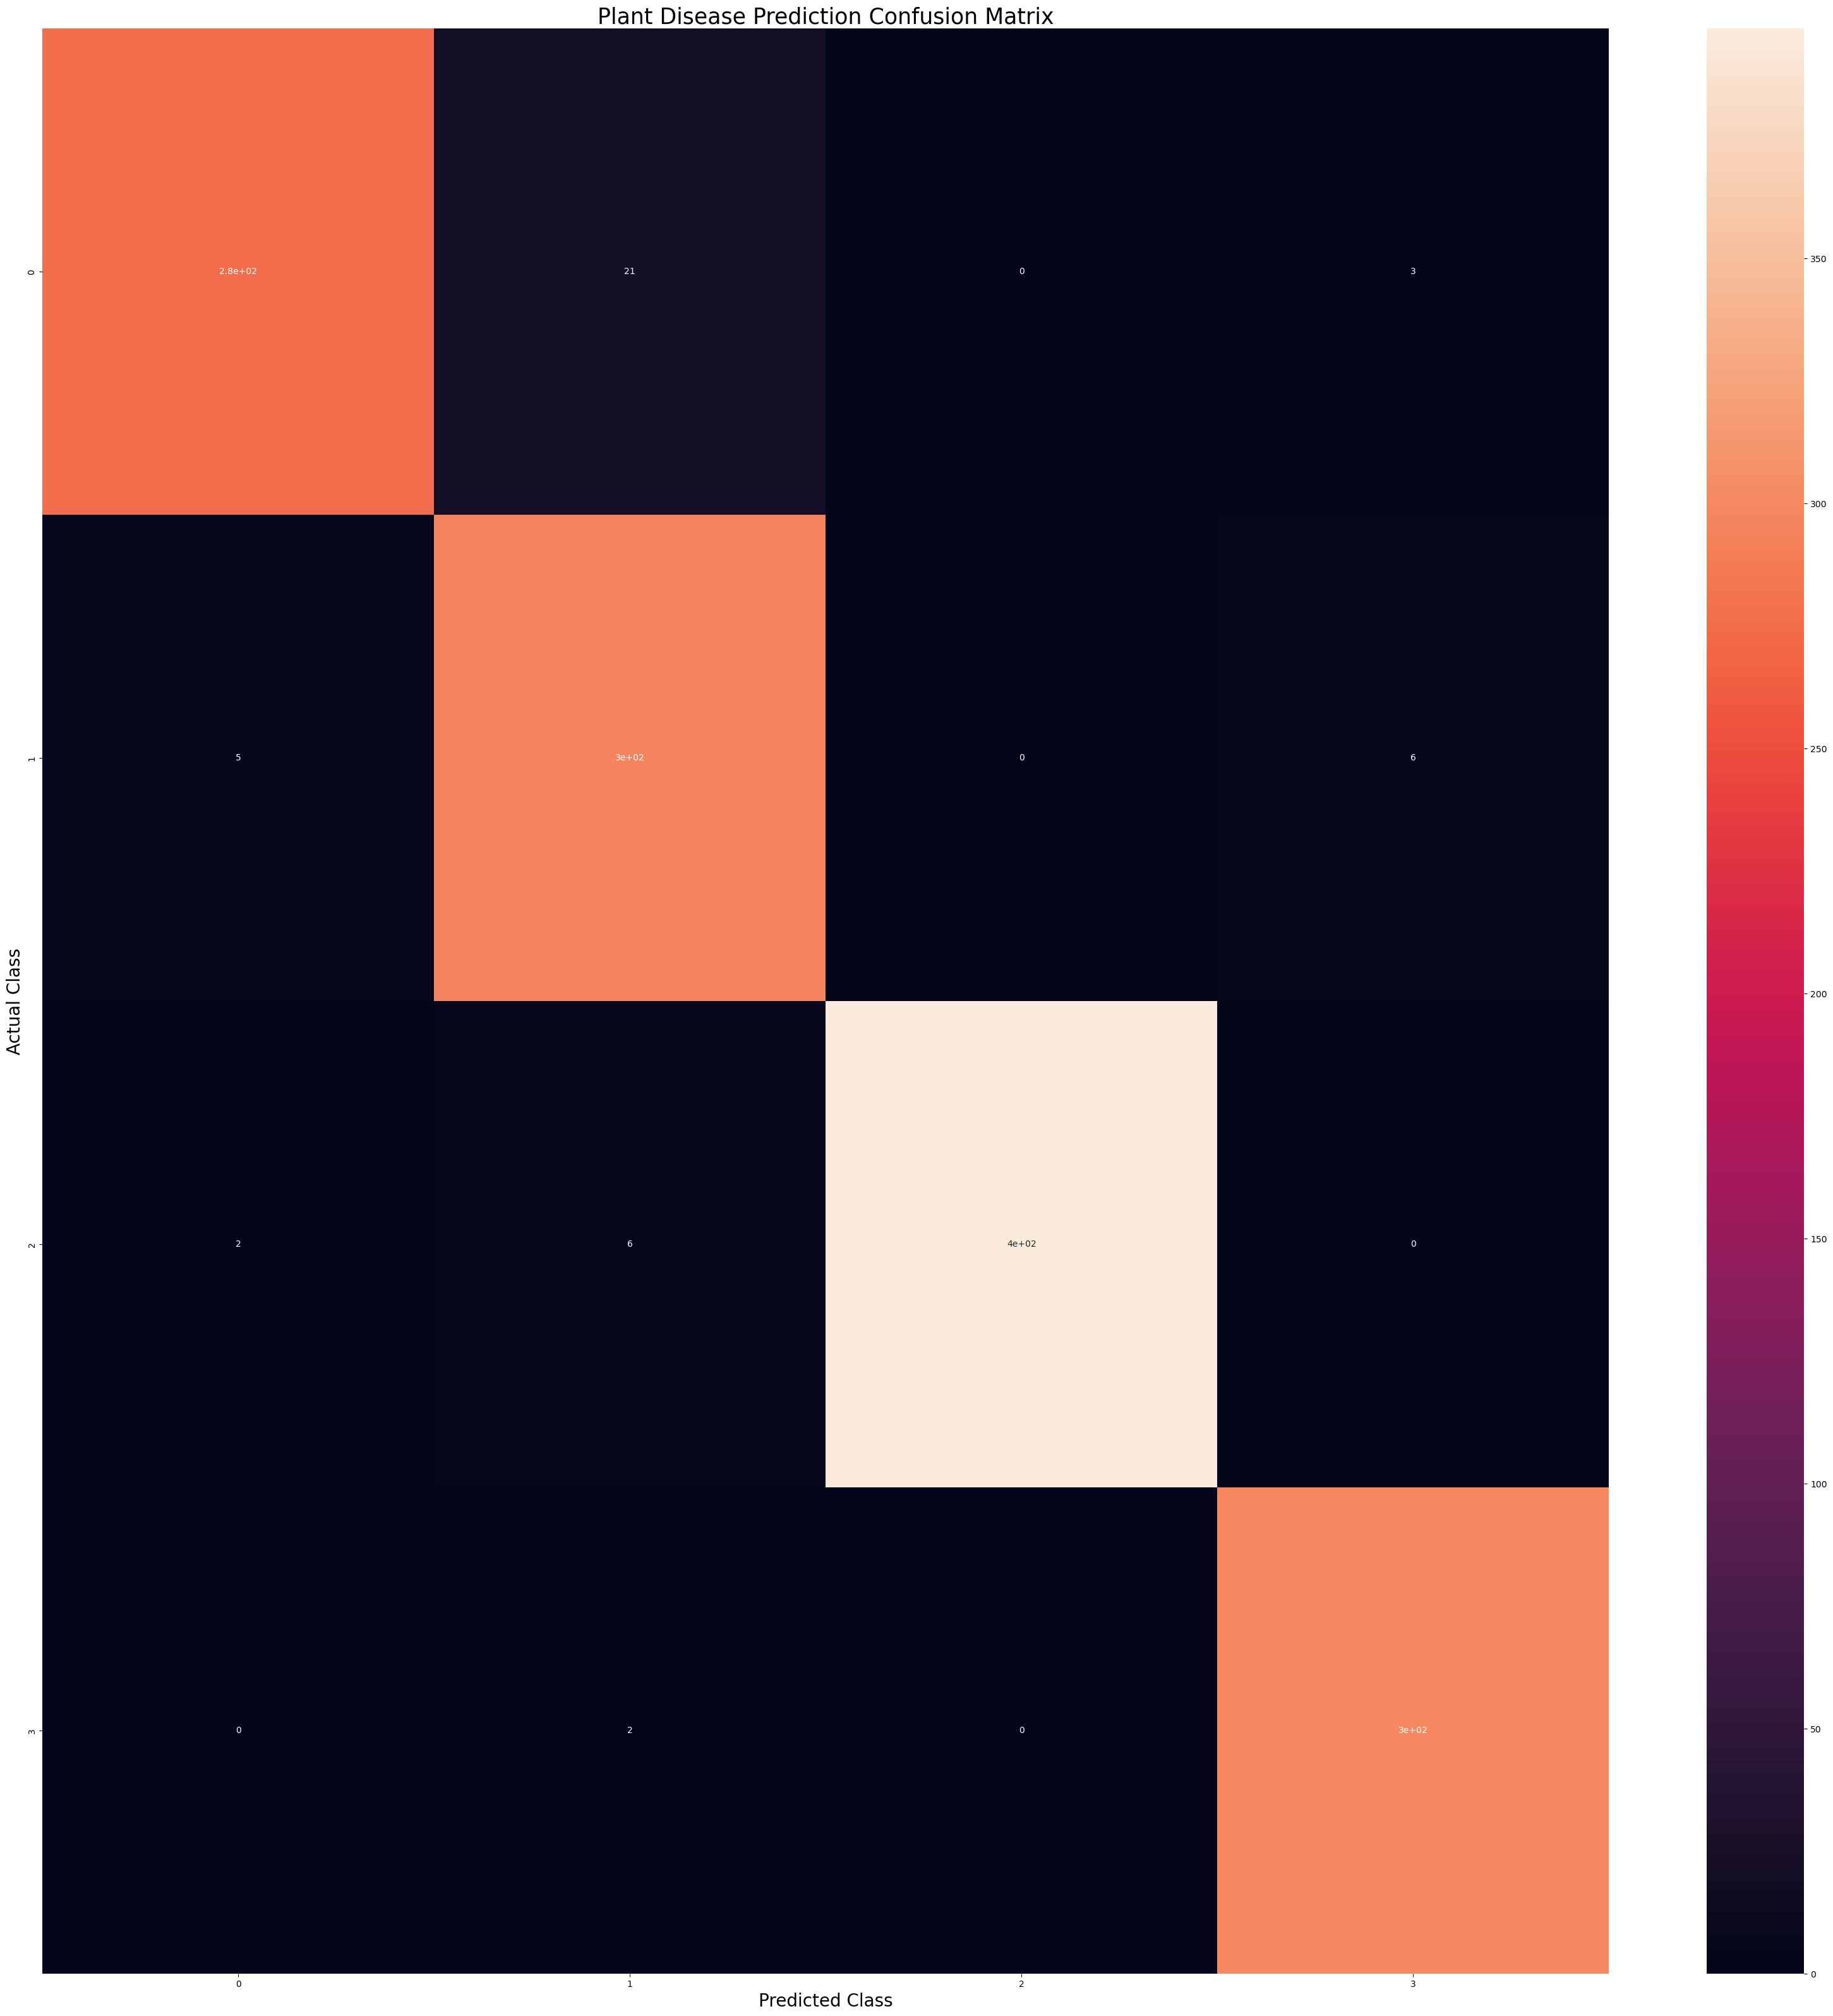

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()